# 비슷한 여성 인구 구조를 가진 지역 찾기<br>
### 1. '2021년 10월 연령별 인구현황' 데이터에서 인구 정보 추출
    지역의 총 인구 당 연령별 여성 인구 비율 (연령별 여성 인구/지역 총 인구) 구하기
### 2. 입력 받은 지역을 찾아 기준 지역으로 설정하기
### 3. 기준 지역과 가장 비슷한 여성 인구 구조를 가진 지역 찾기
    연령 별로 (기준 지역 여성 인구 비율 - 타 지역 여성 인구 비율)의 제곱 값을 모두 더해 차이가 가장 작은 지역 찾기
### 4. 꺾은선 그래프로 시각화

## 라이브러리 불러오기

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터 읽어오기
- csv 파일 읽어오기
- 전체 데이터를 총인구수(남+여)로 나누어 비율로 변환
- 남성 데이터를 제외한 여성 데이터만 추출
    - transpose로 '여'가 포함된 자료만 추출
- 총인구수, 연령구간인구수 열 삭제

In [10]:
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df.fillna(0)
df = df.div(df['남_총인구수'] + df['여_총인구수'], axis=0)
df = df.T
df = df[df.index.str.contains('여')]
df = df.T
del df['여_총인구수'], df['여_연령구간인구수']
df = df.fillna(0)

## 기준 지역 인구 구조 저장
- 기준 지역이 될 지역 이름을 입력 받기
- 지역 이름에 해당하는 행 찾아 인구 구조 저장
- 지역 이름 행정구역코드 삭제 후 저장

In [11]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ')
a = df.index.str.contains(name)
df2 = df[a]
name = df2.index[0].split('(')[0]

## 기준 지역과 다른 지역들의 여성 인구 비율 차이 계산
- 여성 인구 비율 데이터에서 기준 지역 여성 인구 비율을 뺀다.
- 뺀 값의 제곱 값을 모두 더한다.

In [12]:
x = df.sub(df2.iloc[0], axis=1)
y = np.power(x, 2)
z = y.sum(axis=1)

## 차이가 가장 적은 지역 찾기
- 내림차순 정렬 후, 상위 2개 지역 추출
    - 첫 번째: 기준 지역, 두 번째: 찾은 지역
    - 찾은 지역의 이름 행정구역코드 삭제 후 저장

In [13]:
i = z.sort_values().index[:2]
result_name = i[1].split('(')[0]

## 시각화
- 도출한 데이터 꺾은 선 그래프로 시각화
- 그래프 설정: 사이즈 조절, 스타일, 폰트, 해상도 등
- x축 눈금 값 설정 (기존: 여_*세 -> 변경: *세)
- 범례 조정 (행정구역코드 삭제하여 저장한 지역 이름)
- 그래프 png 파일 저장

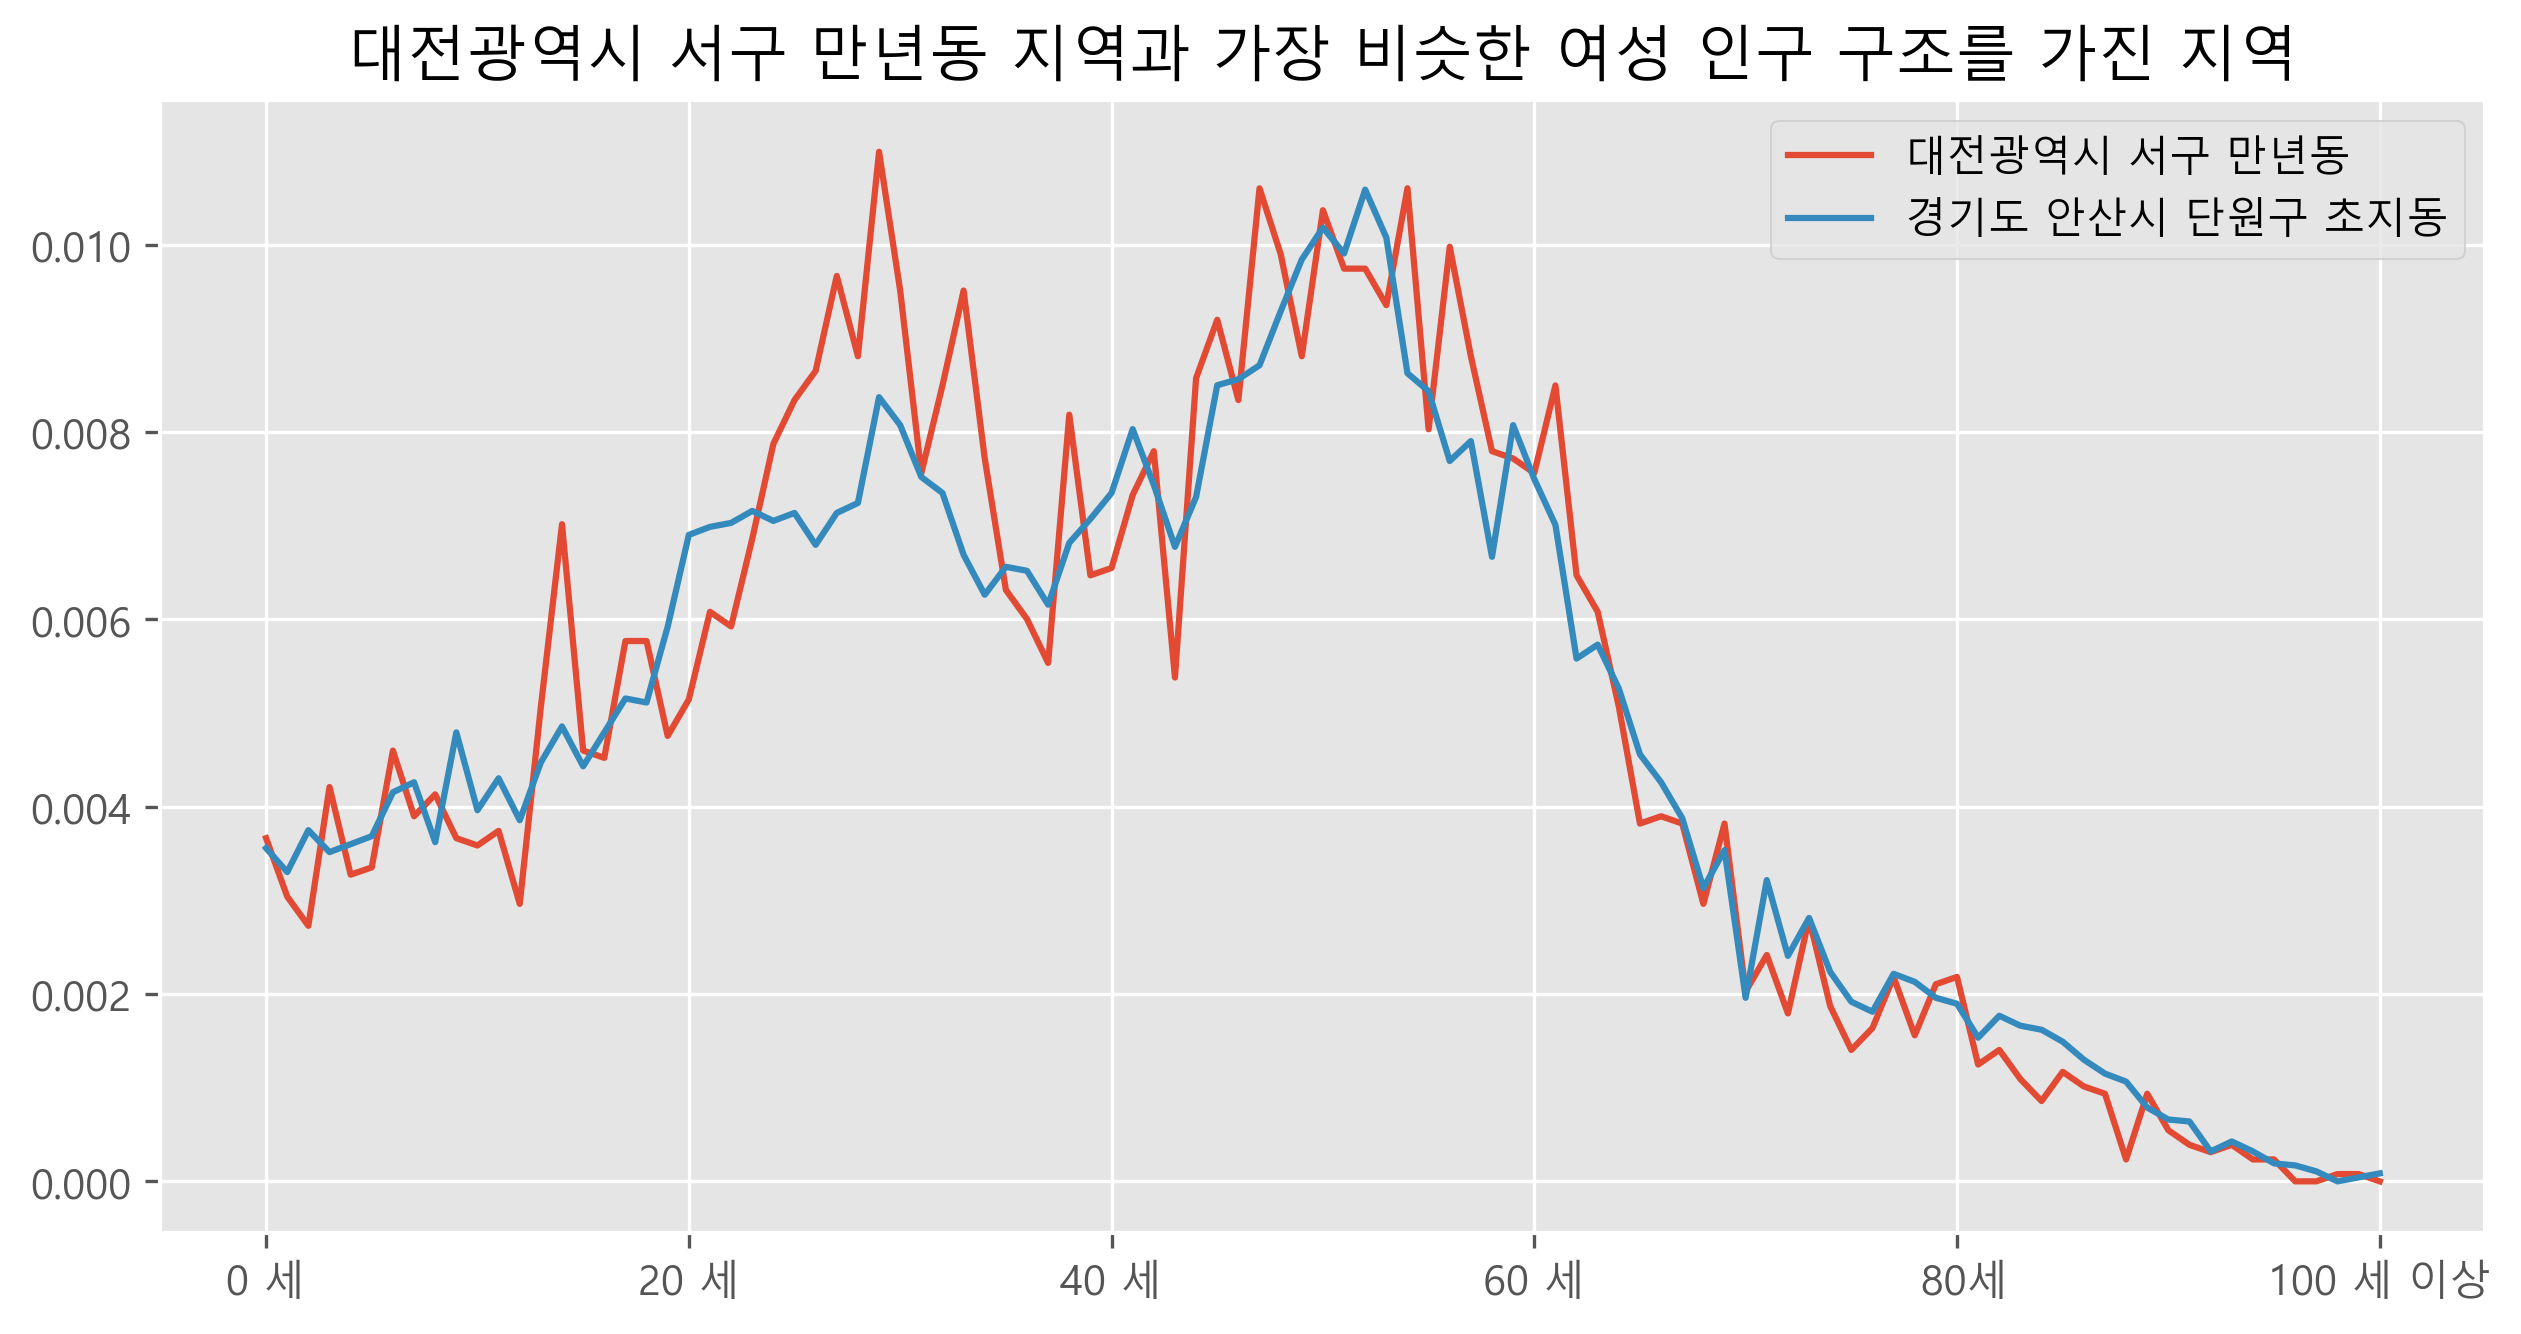

In [14]:
df.loc[i].T.plot(figsize=(10, 5),
                 title=name + ' 지역과 가장 비슷한 여성 인구 구조를 가진 지역')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.dpi'] = 300
plt.xticks(np.arange(0, 101, 20), ['0 세', '20 세', '40 세', '60 세', ' 80세', '100 세 이상'])
plt.legend([name, result_name])
plt.savefig('2plot.png')
plt.show()